In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
!pip3 install matplotlib
!pip3 install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.7/28.7 MB 1.1 MB/s eta 0:00:0000:0100:01


In [8]:
ath= pd.read_csv('/Users/Lahari/Downloads/archive/athlete_events.csv')
rgn= pd.read_csv('/Users/Lahari/Downloads/archive/noc_regions.csv')

In [9]:
ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [10]:
rgn.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [13]:
#joinin the data frames
ath_db= ath.merge(rgn, how= 'left',on='NOC')
ath_db.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [14]:
ath_db.shape

(271116, 17)

In [17]:
#Making the column names consistent
ath_db.rename(columns={'region':'Region','notes':'Notes'},inplace=True)
ath_db.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [18]:
ath_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [19]:
ath_db.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [20]:
nan_values=ath_db.isna()
nan_columns=nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [21]:
ath_db.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [22]:
#Printing the columns with null values in the form of a list
nan_values=ath_db.isna()
nan_columns=nan_values.any()
columns_with_nan= ath_db.columns[nan_columns].tolist()
print(columns_with_nan)

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']


In [24]:
#Details of countries
ath_db.query('Team=="India"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [28]:
#Top countries
top_10= ath_db.Team.value_counts().sort_values(ascending=False).head(10)
top_10

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

<AxesSubplot:title={'center':'Overall by a Country'}, ylabel='Team'>

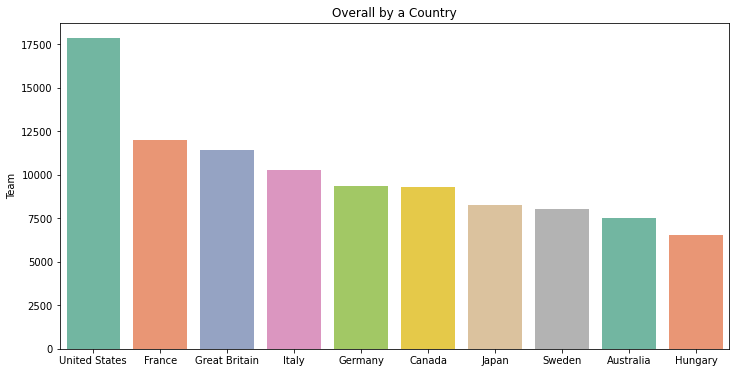

In [32]:
#Plot for top_10
plt.figure(figsize=(12,6))
plt.title('Overall by a Country')
sns.barplot(x=top_10.index, y=top_10, palette='Set2')

(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.0000e+02, 1.7100e+02,
        1.5600e+02, 1.1800e+02, 1.1400e+02, 5.6000e+01, 8.5000e+01,
        6.1000e+01, 3.2000e+01, 1.6000e+01, 9.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <BarContainer object of 34 artists>)

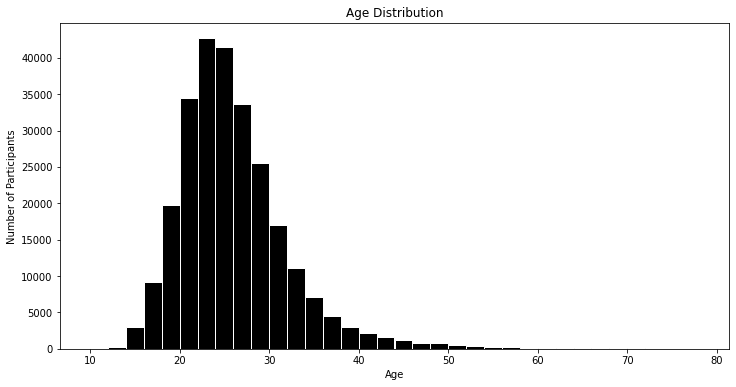

In [38]:
#Age Distribution
plt.figure(figsize=(12,6))
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.hist(ath_db.Age, bins = np.arange(10,80,2), color='black', edgecolor='white')  

In [40]:
#Winter sports
winter_sports= ath_db[ath_db.Season=='Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [41]:
Summer_sports= ath_db[ath_db.Season=='Summer'].Sport.unique()
Summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [47]:
gender_counts=ath_db.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x17de1f940>,
 [Text(0.20089640434146097, -1.081499253223354, 'M'),
  Text(-0.2008963030841931, 1.081499272032628, 'F')],
 [Text(0.10957985691352415, -0.5899086835763748, '72.5%'),
  Text(-0.10957980168228713, 0.5899086938359788, '27.5%')])

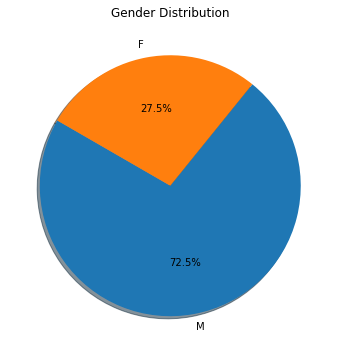

In [49]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=150, shadow=True)

In [50]:
#Total Medals
ath_db.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [53]:
female_prt=ath_db[(ath_db.Sex=='F')&(ath_db.Season=='Summer')][['Sex','Year']]
female_prt=female_prt.groupby('Year').count().reset_index()
female_prt.head()
female_prt.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [54]:
#Gold medalists
gold_medals=ath_db[(ath_db.Medal=='Gold')]
gold_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [55]:
#considering values other than NAN
gold_medals=gold_medals[np.isfinite(gold_medals['Age'])]

In [56]:
gold_medals['ID'][gold_medals['Age']>60].count()

6

In [57]:
sporting=gold_medals['Sport'][gold_medals['Age']>60]
sporting

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Golds over 60')

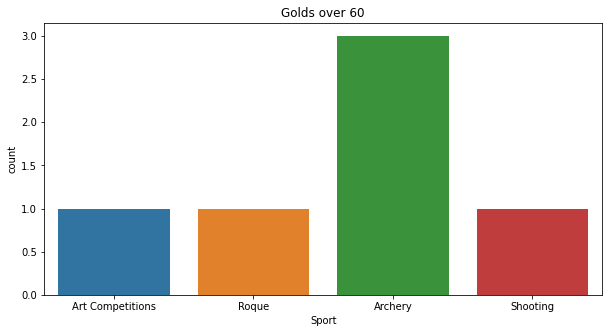

In [59]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(sporting)
plt.title('Golds over 60')


In [61]:
#Golds for Countries
gold_medals.Region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


In [63]:
#Rio 
max_year=ath_db.Year.max()
max_year

team_names=ath_db[(ath_db.Year==max_year)&(ath_db.Medal=='Gold')].Team
team_names.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

Text(0.5, 0, 'Countrywise Golds')

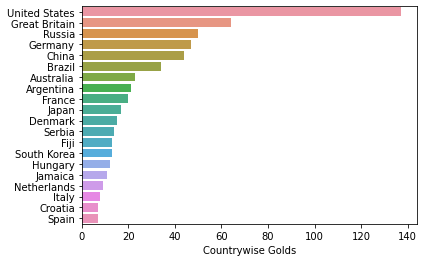

In [65]:
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)
plt.ylabel(None)
plt.xlabel('Countrywise Golds')

In [66]:
not_nullmedals=ath_db[(ath_db['Height'].notnull())& (ath_db['Weight'].notnull())]

Text(0.5, 1.0, 'Height vs Weight')

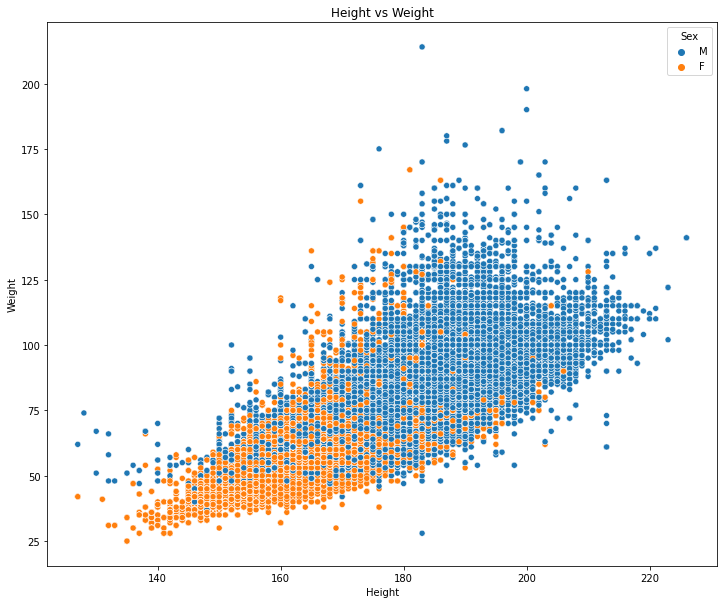

In [68]:
plt.figure(figsize=(12,10))
axis= sns.scatterplot(x="Height", y="Weight", data=not_nullmedals, hue="Sex")
plt.title('Height vs Weight')
           